In [1]:
import numpy as np
from tifffile import imsave
from NtruEncrypt import *
from Polynomial import Zx
from num_to_polynomial import *
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
def scale_array(dat, out_range=(0, 1)):
    domain = [np.min(dat, axis=0), np.max(dat, axis=0)]

    def interp(x):
        return out_range[0] * (1.0 - x) + out_range[1] * x

    def uninterp(x):
        b = 0
        if (domain[1] - domain[0]) != 0:
            b = domain[1] - domain[0]
        else:
            b =  1.0 / domain[1]
        return (x - domain[0]) / b

    return interp(uninterp(dat))


In [3]:
def revert_dimension(lst,a,b):
    rd = []
    for i in range(a):
        t = []
        for j in range(b):
            t.append(lst[j+i*b])
        rd.append(t)
    return rd


In [4]:
def flatten_list(lst):
    return [val for l in lst for val in l]

In [5]:
d = 5
p = 3
q = 128

message = input("Enter Message: ")

print('Curve Parameters')
elliptic_a = int(input("Enter A: "))
elliptic_b = int(input("Enter B: "))

character_polynomials,N = koblitz_encoder(message,elliptic_a,elliptic_b) 

public_key,private_key = generate_keypair(p,q,d,N)

print('\nPublic Key = ',end='')
print(public_key.print_polynomial())

print('\nEncrypted = ')
cipher_polys = []
coefficients = []
for element in character_polynomials:
    cipher_text = encrypt(element,public_key,d,N,q)
    cipher_text.coeffs = list(map(int, cipher_text.coeffs))
    cipher_polys.append(cipher_text)
    coefficients.append(cipher_text.coeffs)
print(coefficients)

Enter Message: Awnon
Curve Parameters
Enter A: 9
Enter B: 7

Public Key = (-18x^14) + (60x^13) + (58x^12) + (47x^11) + (-19x^10) + (46x^9) + (-36x^8) + (13x^7) + (-41x^6) + (-60x^5) + (18x^4) + (-47x^3) + (-58x^2) + (53x) + (-13)

Encrypted = 
[[26, 24, -24, -24, 16, 38, 57, 34, -28, 0, 17, 12, 61, 39, 4], [2, -28, 8, 9, 34, 20, 12, -40, 38, -23, 39, 27, 10, -2, 23], [-27, 59, 4, -35, 26, -9, -26, -19, 30, 38, 14, 11, 48, 56, -52], [-17, 23, 56, -29, -11, 9, -54, 28, 28, -22, 1, 50, -2, -32, -24], [6, -14, 41, -44, 58, -57, -32, 0, -9, 10, -17, 57, -64, -31, -30]]


In [6]:
x_trans = scale_array(flatten_list(coefficients))

print('Convert this to image:')
to_img = revert_dimension(x_trans,len(coefficients),N)
print(to_img)

to_img = np.asarray(to_img)

print('Generating Image...')

imsave('encrypted_image.tiff', to_img)

Convert this to image:
[[0.72, 0.704, 0.32, 0.32, 0.64, 0.816, 0.968, 0.784, 0.288, 0.512, 0.648, 0.608, 1.0, 0.824, 0.544], [0.528, 0.288, 0.576, 0.584, 0.784, 0.672, 0.608, 0.192, 0.816, 0.328, 0.824, 0.728, 0.592, 0.496, 0.696], [0.296, 0.984, 0.544, 0.232, 0.72, 0.44, 0.304, 0.36, 0.752, 0.816, 0.624, 0.6, 0.896, 0.96, 0.096], [0.376, 0.696, 0.96, 0.28, 0.424, 0.584, 0.08, 0.736, 0.736, 0.336, 0.52, 0.912, 0.496, 0.256, 0.32], [0.56, 0.4, 0.84, 0.16, 0.976, 0.056, 0.256, 0.512, 0.44, 0.592, 0.376, 0.968, 0.0, 0.264, 0.272]]
Generating Image...


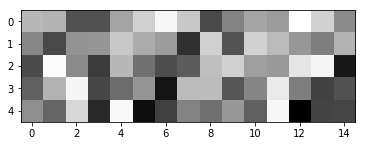

In [7]:
plt.imshow(to_img, cmap='gray')
plt.show()

In [8]:
import imageio
from numpy import asarray
from PIL import Image

image = imageio.imread('encrypted_image.tiff')

pixels = asarray(image)

print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float64')

print(pixels)
decoded_coefficients = []
for p in pixels:
    for j in p:
        decoded_coefficients.append(j)



Data Type: float64
Min: 0.000, Max: 1.000
[[0.72  0.704 0.32  0.32  0.64  0.816 0.968 0.784 0.288 0.512 0.648 0.608
  1.    0.824 0.544]
 [0.528 0.288 0.576 0.584 0.784 0.672 0.608 0.192 0.816 0.328 0.824 0.728
  0.592 0.496 0.696]
 [0.296 0.984 0.544 0.232 0.72  0.44  0.304 0.36  0.752 0.816 0.624 0.6
  0.896 0.96  0.096]
 [0.376 0.696 0.96  0.28  0.424 0.584 0.08  0.736 0.736 0.336 0.52  0.912
  0.496 0.256 0.32 ]
 [0.56  0.4   0.84  0.16  0.976 0.056 0.256 0.512 0.44  0.592 0.376 0.968
  0.    0.264 0.272]]


In [9]:
x_inv = scale_array(decoded_coefficients,(np.min(flatten_list(coefficients), axis=0), np.max(flatten_list(coefficients), axis=0)))
x_inv = [round(i) for i in x_inv]
x_inv = list(map(int, x_inv))
decoded_coefficients = revert_dimension(x_inv,len(coefficients),N)

In [10]:
print(decoded_coefficients)

[[26, 24, -24, -24, 16, 38, 57, 34, -28, 0, 17, 12, 61, 39, 4], [2, -28, 8, 9, 34, 20, 12, -40, 38, -23, 39, 27, 10, -2, 23], [-27, 59, 4, -35, 26, -9, -26, -19, 30, 38, 14, 11, 48, 56, -52], [-17, 23, 56, -29, -11, 9, -54, 28, 28, -22, 1, 50, -2, -32, -24], [6, -14, 41, -44, 58, -57, -32, 0, -9, 10, -17, 57, -64, -31, -30]]


In [11]:
print(coefficients)

[[26, 24, -24, -24, 16, 38, 57, 34, -28, 0, 17, 12, 61, 39, 4], [2, -28, 8, 9, 34, 20, 12, -40, 38, -23, 39, 27, 10, -2, 23], [-27, 59, 4, -35, 26, -9, -26, -19, 30, 38, 14, 11, 48, 56, -52], [-17, 23, 56, -29, -11, 9, -54, 28, 28, -22, 1, 50, -2, -32, -24], [6, -14, 41, -44, 58, -57, -32, 0, -9, 10, -17, 57, -64, -31, -30]]


In [12]:
if coefficients == decoded_coefficients:
    print('Complete Match!')
else:
    print('Not Equal!')

Complete Match!
